# Used Car Price Prediction Modeling
### Basic Linear Regression Modeling and Analysis

### Import all libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Read Data
Data contains 24198 rows and 17 columns

Categorical columns: 13

Numerical columns: 4

In [4]:
data = pd.read_csv('originalData.csv')
print(data.describe())
print()
print(data.info())

         Unnamed: 0          Year    Passengers         Price
count  24198.000000  24198.000000  12025.000000  2.419800e+04
mean   12098.500000   2018.263534      5.097963  5.007124e+04
std     6985.505243      5.155973      1.009955  7.462272e+04
min        0.000000   1928.000000      2.000000  5.000000e+02
25%     6049.250000   2016.000000      5.000000  2.368500e+04
50%    12098.500000   2019.000000      5.000000  3.699000e+04
75%    18147.750000   2022.000000      5.000000  5.998000e+04
max    24197.000000   2024.000000     15.000000  3.999998e+06

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24198 entries, 0 to 24197
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        24198 non-null  int64  
 1   Year              24198 non-null  int64  
 2   Make              24198 non-null  object 
 3   Model             24198 non-null  object 
 4   Kilometres        23965 non-null  object 
 5 

##### Drop all unnecessary columns and null values

In [5]:
df = data.drop(['Unnamed: 0','Model',' Engine', ' Transmission',' Drivetrain',' Fuel Type',' Exterior Colour',' Interior Colour', ' Passengers',' Doors', ' Highway'], axis =1)
df.columns = df.columns.str.strip()
df = df.dropna()
df

,Year,Make,Kilometres,Body Type,City,Price
0,2019,Acura,53052 km,SUV,12.2L/100km,43880
1,2018,Acura,77127 km,SUV,12.6L/100km,36486
2,2019,Acura,33032 km,SUV,11.0L/100km,40888
3,2020,Acura,50702 km,SUV,11.0L/100km,44599
4,2021,Acura,67950 km,SUV,11.3L/100km,46989
...,...,...,...,...,...,...
24174,2008,Volvo,202800 km,Sedan,13.3L/100km,8995
24176,2012,Volvo,145000 km,Sedan,10.5L/100km,11495
24180,2007,Volvo,177539 km,Wagon,12.8L/100km,11990
24181,2010,Volvo,169165 km,Wagon,13.8L/100km,13995


##### Extract numerical values from Kilometres and City columns.

In [6]:
df.loc[:, 'Kilometres'] = df['Kilometres'].str.extract(r'(\d+)', expand=False).astype('int64')
df.loc[:,'City'] = df['City'].str.extract(r'(\d+)', expand=False).astype('int64')
df

,Year,Make,Kilometres,Body Type,City,Price
0,2019,Acura,53052,SUV,12,43880
1,2018,Acura,77127,SUV,12,36486
2,2019,Acura,33032,SUV,11,40888
3,2020,Acura,50702,SUV,11,44599
4,2021,Acura,67950,SUV,11,46989
...,...,...,...,...,...,...
24174,2008,Volvo,202800,Sedan,13,8995
24176,2012,Volvo,145000,Sedan,10,11495
24180,2007,Volvo,177539,Wagon,12,11990
24181,2010,Volvo,169165,Wagon,13,13995


### Plots
Plotting scatter graphs and linear line for all numerical values. 

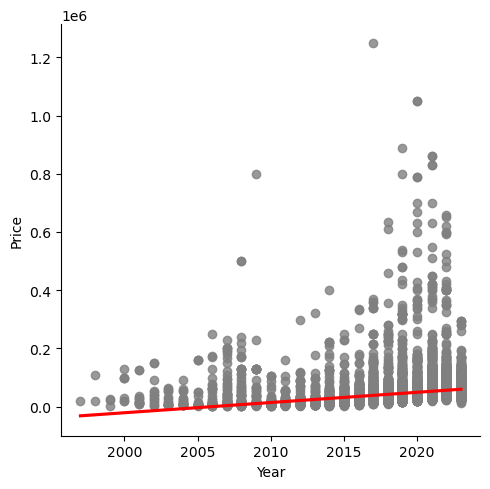

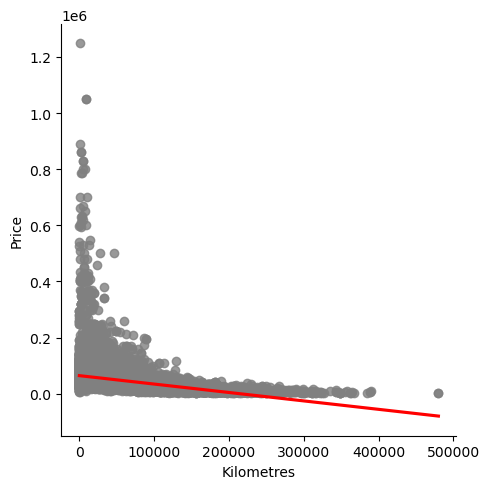

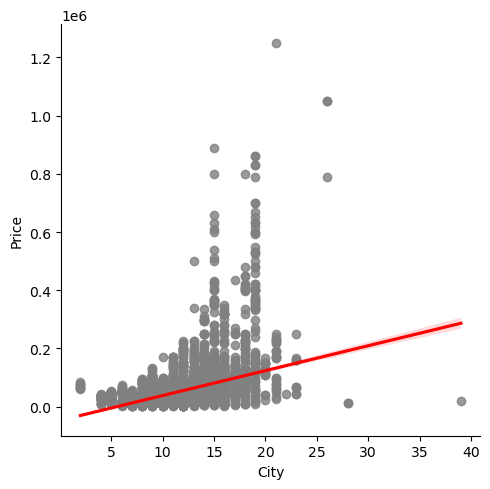

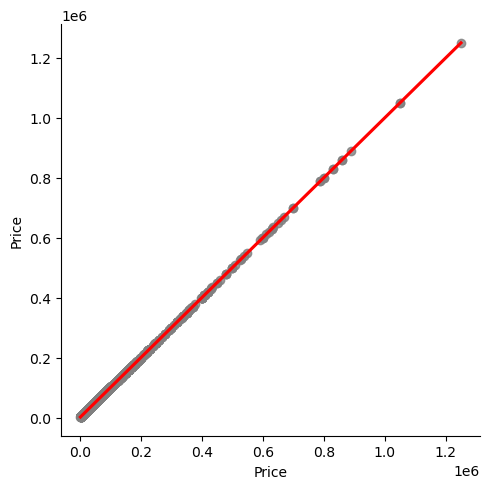

In [7]:
numerics = [col for col in list(df.columns) if df[col].dtype == 'int64']
for col in numerics:
    sns.lmplot(x=col, y="Price", data=df, line_kws={"color": "red"}, scatter_kws={"color": "grey"})
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

### Outlier Detection
Remove outliers using inter quarter range and setting a minimum price of the cars.
The minimum price is set to reduce negative values.

In [8]:
q1, q3 = df['Price'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound) & (df['Price'] > 3000)].dropna()
df

,Year,Make,Kilometres,Body Type,City,Price
0,2019,Acura,53052,SUV,12,43880
1,2018,Acura,77127,SUV,12,36486
2,2019,Acura,33032,SUV,11,40888
3,2020,Acura,50702,SUV,11,44599
4,2021,Acura,67950,SUV,11,46989
...,...,...,...,...,...,...
24174,2008,Volvo,202800,Sedan,13,8995
24176,2012,Volvo,145000,Sedan,10,11495
24180,2007,Volvo,177539,Wagon,12,11990
24181,2010,Volvo,169165,Wagon,13,13995


### Encoding 
Encoding categorical values using Label Encoder. Drop encoded columns in the end.

In [9]:
le = LabelEncoder()
encoded = le.fit(df['Make'])
df['Make_en'] = le.transform(df['Make'])

le1 = LabelEncoder()
encoded2 = le1.fit(df['Body Type'])
df['Body_en'] = le1.transform(df['Body Type'])

df = df.drop(['Body Type', 'Make'], axis=1)
df

,Year,Kilometres,City,Price,Make_en,Body_en
0,2019,53052,12,43880,0,11
1,2018,77127,12,36486,0,11
2,2019,33032,11,40888,0,11
3,2020,50702,11,44599,0,11
4,2021,67950,11,46989,0,11
...,...,...,...,...,...,...
24174,2008,202800,13,8995,33,12
24176,2012,145000,10,11495,33,12
24180,2007,177539,12,11990,33,25
24181,2010,169165,13,13995,33,25


### Model Training and testing
Data is split 80/20 ratio for train and test data. Use all the columns as feature columns and price as the prediction column.
After using multiple ML models, Linear Regression has the highest accuraccy. We measure the performance of the model
using r2 score, RMSE(Root Mean Squared Error), and MAE(Mean Absolute Error).


In [34]:
x = df[['Year', 'Kilometres', 'City', 'Make_en', 'Body_en']]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
#model = RandomForestClassifier()
#model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)
predicted_price = model.predict(x_test)

accuracy = r2_score(y_test, predicted_price)
mse = mean_squared_error(y_test, predicted_price)
mae = mean_absolute_error(y_test, predicted_price)
rmse = np.sqrt(mse)

print('R2 Score',accuracy)
print('RMSE:', rmse)
print('MAE:', mae)


R2 Score 0.7045997304016007
RMSE: 11001.01491047552
MAE: 8183.467334017504


### Plot test vs predicted prices

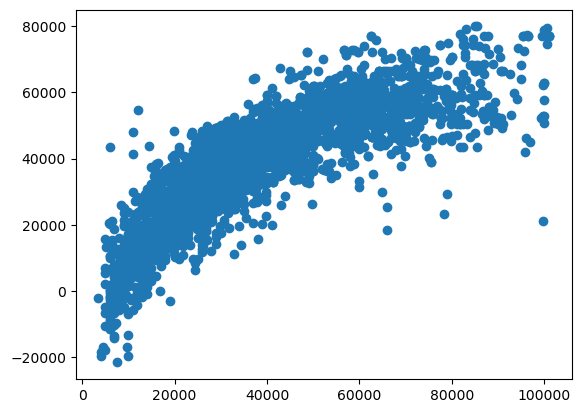

In [35]:
plt.scatter(y_test, predicted_price)
plt.show()

### Optional: User input Prediction
Takes input from user to predict price of the car.

In [37]:
print('Models:', data['Make'].unique())
print('Body Types:', data['Body Type'].unique())
predict = []

print()
y = input("Enter year: ")
k = input("Enter Kilometres run: ")
c = input("Enter city mileage: ")
m = input("Enter make: ")
b = input("Enter body type: ")

predict = [int(y), int(k), int(c), str(m), str(b)]


#Conver string values to encoded values and predict price
transformed_data = [
    predict[0],
    predict[1],
    predict[2],
    le.transform([predict[3]])[0],
    le1.transform([predict[4]])[0]
]

prediction = model.predict([transformed_data])
print()
print('Year', 'Kilometres', 'City', 'Make', 'Body')
print('Model:', predict)
print('Predicted price:', prediction[0].round())

Models: ['Acura' 'Alfa Romeo' 'Audi' 'Bentley' 'Volvo' 'BMW' 'Aston Martin'
 'Autozam' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Daimler'
 'Datsun' 'Maserati' 'Porsche' 'Mazda' 'McLaren' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Scion' 'Subaru' 'Tesla' 'Dodge' 'Ferrari' 'Fiat' 'Fisker'
 'Ford' 'Freightliner' 'Genesis' 'GMC' 'Hino' 'Honda' 'Hummer' 'Hyundai'
 'Infiniti' 'International' 'Isuzu' 'Jaguar' 'Jeep' 'Karma' 'Kia'
 'Lamborghini' 'Lancia' 'Nissan' 'Polestar' 'Rolls-Royce' 'Suzuki'
 'Volkswagen']
Body Types: ['SUV' 'Sedan' nan 'Coupe' 'Hatchback' 'Wagon' 'Roadster' 'Convertible'
 'Station Wagon' 'Truck' 'Truck Extended Cab' 'Extended Cab' 'Crew Cab'
 'Truck Crew Cab' 'Truck Long Extended Cab' 'Regular Cab' 'Compact'
 'Super Cab' 'Minivan' 'Cabriolet' 'Van Regular' 'Truck Quad Cab'
 'Super Crew' 'Quad Cab' 'Van Extended' 'Truck Super Cab'
 'Truck Long Super Cab' 'Truck Double Cab' 'Truck Short Super Cab'
 'Truck King Cab' 'Truck Long Crew Cab']

Enter year: 2015
Enter Kilom